<a href="https://colab.research.google.com/github/buzzbing/transformer_based_source_code_generator/blob/main/K_Fold_Mod_SPoC_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install tensorflow_datasets
!pip install -U 'tensorflow-text==2.8.*'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.1 MB/s 


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import collections
import os
import pathlib
import re
import string
import sys
import tempfile
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_text as text
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import keras
import logging



In [ ]:

logging.getLogger('tensorflow').setLevel(logging.ERROR)  

In [ ]:
dataset = pd.read_csv("drive/MyDrive/Datasets/data/spoc_cleaned_next.csv")

In [ ]:
# train_data = tf.data.Dataset.from_tensor_slices(train_examples)
# val_data = tf.data.Dataset.from_tensor_slices(val_examples)
# tf.data.experimental.cardinality(val_data)

<tf.Tensor: shape=(), dtype=int64, numpy=547>

In [ ]:
# print(tf.data.experimental.cardinality(val_data))
# print(tf.data.experimental.cardinality(train_data))

tf.Tensor(547, shape=(), dtype=int64)
tf.Tensor(14000, shape=(), dtype=int64)


In [ ]:
def dataset_to_tensor(data_examples):
  data_prob = []
  for i in range(0,len(data_examples)):
    data_prob.append(str(data_examples.iloc[i,0]))

  # inputs = data_examples['problem']
  # print(data_prob[0])
  # print(type(data_prob))

  data_sol = []
  for i in range(0,len(data_examples)):
    data_sol.append(str(data_examples.iloc[i,1]))

  # inputs = data_examples['solution']
  # print(data_sol[0])
  # print(type(data_sol))

  tensor_prob = tf.convert_to_tensor(data_prob)
  tensor_sol = tf.convert_to_tensor(data_sol)

  tensor_data = tf.data.Dataset.from_tensor_slices((tensor_prob,tensor_sol))

  # tf.data.experimental.cardinality(tensor_data)
  return tensor_data, tensor_prob, tensor_sol;

In [ ]:
dataset_tensr , prob_tensr, sol_tensr = dataset_to_tensor(dataset)

if b=1 return a_ else call function gcd(b_ a%b)            n _ nn_ ans = integers with ans =0    Read n    for i=2 to n-1 execute    set nn to n    while nn is not equal to 0_ set ans to ans + nn%i_ and also set nn= nn/i        set o to gcd(ans_ n-2)    print out ans/o "/" (n-2)/o            function gcd with integer arguments a and b    return !b ? a : gcd(b_ a % b)            integers n_ nn and ans = 0    read n    for i = 2 to n - 1 inclusive    set nn to n    while nn increment ans by (nn % i) and set nn to nn / i;        integer o = gcd of ans and n - 2    print ans / o_ "/"_ (n - 2) / o and "\n"            
<class 'list'>
return !b ? a : gcd(b_ a % b);    }    int main() {    int n_ nn_ ans = 0;    cin >> n;    for (int i = 2; i <= n - 1; ++i) {    nn = n;    while (nn) ans += nn % i_ nn /= i;    }    int o = gcd(ans_ n - 2);    cout << ans / o << "/" << (n - 2) / o << "\n";    return 0;    }    int gcd(int a_ int b) {    return !b ? a : gcd(b_ a % b);    }    int main() {    int

In [ ]:
print("length of dataset tensor: ", tf.data.experimental.cardinality(dataset_tensr))
print("length of problem attribute tensor: ", len(prob_tensr))
print("length of solution tensor: ", len(sol_tensr))

length of dataset tensor:  tf.Tensor(14547, shape=(), dtype=int64)
length of problem attribute tensor:  14547
length of solution tensor:  14547


In [ ]:
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [ ]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = 10000,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [ ]:
train_pb = tf.data.Dataset.from_tensor_slices(prob_tensr)
train_sl = tf.data.Dataset.from_tensor_slices(sol_tensr)

In [ ]:
%%time
prob_vocab = bert_vocab.bert_vocab_from_dataset(
    train_pb.batch(2000).prefetch(20),
    **bert_vocab_args
)
sol_vocab = bert_vocab.bert_vocab_from_dataset(
    train_sl.batch(2000).prefetch(20),
    **bert_vocab_args
)

CPU times: user 28.1 s, sys: 112 ms, total: 28.2 s
Wall time: 28.6 s


In [ ]:
print(prob_vocab[:10])
print(prob_vocab[100:110])
print(prob_vocab[1000:1010])
print(prob_vocab[-10:])
print()
print(sol_vocab[:10])
print(sol_vocab[100:110])
# print(sol_vocab[1000:1010])
print(sol_vocab[-10:])

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&']
['new', 'array', 'be', 'inclusive', 'value', 'while', 'greater', 'loop', 'or', 'less']
['201', 'cup', 'fx', 'goto', 'incremented', 'itr', 'menor', 'p4', 'program', 'register']
['##[', '##\\', '##]', '##^', '##_', '##`', '##{', '##|', '##}', '##~']

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&']
['temp', 's1', 'true', 'abs', 'bool', 's2', 'push', 'false', 'sort', 'vector']
['##[', '##\\', '##]', '##^', '##_', '##`', '##{', '##|', '##}', '##~']


In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
write_vocab_file('prob_vocab.txt', prob_vocab)
write_vocab_file('sol_vocab.txt', sol_vocab)

In [ ]:
write_vocab_file('drive/MyDrive/Datasets/data/prob_vocab.txt', prob_vocab)
write_vocab_file('drive/MyDrive/Datasets/data/sol_vocab.txt', sol_vocab)

In [ ]:
!ls *.txt

prob_vocab.txt	sol_vocab.txt


In [ ]:
prob_tokenizer = text.BertTokenizer('/content/prob_vocab.txt', **bert_tokenizer_params)
sol_tokenizer = text.BertTokenizer('/content/sol_vocab.txt', **bert_tokenizer_params)


In [ ]:
for pb_examples in train_pb.batch(2).take(1):
  for ex in pb_examples:
    print(ex.numpy())
print()
for sol_examples in train_sl.batch(2).take(1):
  for ex in sol_examples:
    print(ex.numpy())

b'if b=1 return a_ else call function gcd(b_ a%b)            n _ nn_ ans = integers with ans =0    Read n    for i=2 to n-1 execute    set nn to n    while nn is not equal to 0_ set ans to ans + nn%i_ and also set nn= nn/i        set o to gcd(ans_ n-2)    print out ans/o "/" (n-2)/o            function gcd with integer arguments a and b    return !b ? a : gcd(b_ a % b)            integers n_ nn and ans = 0    read n    for i = 2 to n - 1 inclusive    set nn to n    while nn increment ans by (nn % i) and set nn to nn / i;        integer o = gcd of ans and n - 2    print ans / o_ "/"_ (n - 2) / o and "\\n"            '
b'let a and b be strings    n = integer    st = set of strings    read n    for integer i = 0 to n exclusive    read a and b    insert a + " " + b into st        print size of st and a new line            '

b'return !b ? a : gcd(b_ a % b);    }    int main() {    int n_ nn_ ans = 0;    cin >> n;    for (int i = 2; i <= n - 1; ++i) {    nn = n;    while (nn) ans += nn % i_

In [ ]:
# prob_lookup = tf.lookup.StaticVocabularyTable(
#     num_oov_buckets=1,
#     initializer=tf.lookup.TextFileInitializer(
#         filename='/content/prob_vocab.txt',
#         key_dtype=tf.string,
#         key_index = tf.lookup.TextFileIndex.WHOLE_LINE,
#         value_dtype = tf.int64,
#         value_index=tf.lookup.TextFileIndex.LINE_NUMBER)) 
# prob_tokenizer = text.BertTokenizer(prob_lookup)

In [ ]:
# sol_lookup = tf.lookup.StaticVocabularyTable(
#     num_oov_buckets=1,
#     initializer=tf.lookup.TextFileInitializer(
#         filename='sol_vocab.txt',
#         key_dtype=tf.string,
#         key_index = tf.lookup.TextFileIndex.WHOLE_LINE,
#         value_dtype = tf.int64,
#         value_index=tf.lookup.TextFileIndex.LINE_NUMBER)) 
# sol_tokenizer = text.BertTokenizer(sol_lookup)

In [ ]:
# Tokenize the examples -> (batch, word, word-piece)
token_batch_prob = prob_tokenizer.tokenize(pb_examples)
# Merge the word and word-piece axes -> (batch, tokens)
token_batch_prob = token_batch_prob.merge_dims(-2,-1)

for ex in token_batch_prob.to_list():
  print(ex)

[72, 42, 31, 19, 111, 41, 39, 82, 185, 126, 182, 11, 42, 39, 41, 8, 42, 12, 54, 39, 532, 39, 86, 31, 94, 83, 86, 31, 18, 76, 54, 77, 49, 31, 20, 71, 54, 15, 19, 896, 79, 532, 71, 54, 105, 532, 73, 112, 90, 71, 18, 39, 79, 86, 71, 86, 14, 532, 8, 49, 39, 75, 41, 282, 174, 329, 79, 532, 31, 532, 17, 49, 79, 55, 71, 182, 11, 86, 39, 54, 15, 20, 12, 74, 324, 86, 17, 55, 5, 17, 5, 11, 54, 15, 20, 12, 17, 55, 126, 182, 83, 80, 162, 41, 75, 42, 111, 4, 42, 33, 41, 28, 182, 11, 42, 39, 41, 8, 42, 12, 94, 54, 39, 532, 75, 86, 31, 18, 76, 54, 77, 49, 31, 20, 71, 54, 15, 19, 103, 79, 532, 71, 54, 105, 532, 87, 86, 91, 11, 532, 8, 49, 12, 75, 79, 532, 71, 532, 17, 49, 29, 80, 55, 31, 182, 78, 86, 75, 54, 15, 20, 74, 86, 17, 55, 39, 5, 17, 5, 39, 11, 54, 15, 20, 12, 17, 55, 75, 5, 36, 54, 5]
[96, 41, 75, 42, 102, 179, 54, 31, 80, 192, 31, 79, 78, 179, 76, 54, 77, 80, 49, 31, 18, 71, 54, 84, 76, 41, 75, 42, 227, 41, 14, 5, 5, 14, 42, 156, 192, 74, 97, 78, 192, 75, 41, 100, 114]


In [ ]:


# Tokenize the examples -> (batch, word, word-piece)
token_batch_sol = sol_tokenizer.tokenize(sol_examples)
# Merge the word and word-piece axes -> (batch, tokens)
token_batch_sol = token_batch_sol.merge_dims(-2,-1)

for ex in token_batch_sol.to_list():
  print(ex)

[78, 4, 42, 33, 41, 28, 121, 11, 42, 39, 41, 8, 42, 12, 29, 69, 71, 81, 11, 12, 67, 71, 54, 39, 420, 39, 80, 31, 18, 29, 74, 32, 32, 54, 29, 75, 11, 71, 49, 31, 20, 29, 49, 30, 31, 54, 15, 19, 29, 14, 14, 49, 12, 67, 420, 31, 54, 29, 82, 11, 420, 12, 80, 14, 31, 420, 8, 49, 39, 420, 17, 31, 49, 29, 69, 71, 55, 31, 121, 11, 80, 39, 54, 15, 20, 12, 29, 73, 30, 30, 80, 17, 55, 30, 30, 5, 17, 5, 30, 30, 11, 54, 15, 20, 12, 17, 55, 30, 30, 5, 36, 54, 5, 29, 78, 18, 29, 69, 71, 121, 11, 71, 41, 39, 71, 42, 12, 67, 78, 4, 42, 33, 41, 28, 121, 11, 42, 39, 41, 8, 42, 12, 29, 69, 71, 81, 11, 12, 67, 71, 54, 39, 420, 39, 80, 31, 18, 29, 74, 32, 32, 54, 29, 75, 11, 71, 49, 31, 20, 29, 49, 30, 31, 54, 15, 19, 29, 14, 14, 49, 12, 67, 420, 31, 54, 29, 82, 11, 420, 12, 80, 14, 31, 420, 8, 49, 39, 420, 17, 31, 49, 29, 69, 71, 55, 31, 121, 11, 80, 39, 54, 15, 20, 12, 29, 73, 30, 30, 80, 17, 55, 30, 30, 5, 17, 5, 30, 30, 11, 54, 15, 20, 12, 17, 55, 30, 30, 5, 36, 54, 5, 29, 78, 18, 29, 69]
[84, 41, 39, 4

In [ ]:
# Lookup each token id in the vocabulary.
txt_tokens_prob = tf.gather(prob_vocab, token_batch_prob)
# Join with spaces.
tf.strings.reduce_join(txt_tokens_prob, separator=' ', axis=-1)



<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'if b = 1 return a _ else call function gcd ( b _ a % b ) n _ nn _ ans = integers with ans = 0 read n for i = 2 to n - 1 execute set nn to n while nn is not equal to 0 _ set ans to ans + nn % i _ and a ##l ##s ##o set nn = nn / i set o to gcd ( ans _ n - 2 ) print out ans / o " / " ( n - 2 ) / o function gcd with integer arguments a and b return ! b ? a : gcd ( b _ a % b ) integers n _ nn and ans = 0 read n for i = 2 to n - 1 inclusive set nn to n while nn increment ans by ( nn % i ) and set nn to nn / i ; integer o = gcd of ans and n - 2 print ans / o _ " / " _ ( n - 2 ) / o and " \\ n "',
       b'let a and b be strings n = integer st = set of strings read n for integer i = 0 to n exclusive read a and b insert a + " " + b into st print size of st and a new line'],
      dtype=object)>

In [ ]:
# Lookup each token id in the vocabulary.
txt_tokens_sol = tf.gather(sol_vocab, token_batch_sol)
# Join with spaces.
tf.strings.reduce_join(txt_tokens_sol, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; } int gcd ( int a _ int b ) { return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; }',
       b'string a _ b ; int n ; set < string > st ; cin > > n ; for ( int i = 0 ; i < n ; i + + ) { cin > > a > > b ; st . insert ( a + " " + b ) ; } cout < < st . size ( ) < < endl ; return 0 ; }'],
      dtype=object)>

In [ ]:
prob_words = prob_tokenizer.detokenize(token_batch_prob)
tf.strings.reduce_join(prob_words, separator=' ', axis=-1)

sol_words = sol_tokenizer.detokenize(token_batch_sol)
tf.strings.reduce_join(sol_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; } int gcd ( int a _ int b ) { return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; }',
       b'string a _ b ; int n ; set < string > st ; cin > > n ; for ( int i = 0 ; i < n ; i + + ) { cin > > a > > b ; st . insert ( a + " " + b ) ; } cout < < st . size ( ) < < endl ; return 0 ; }'],
      dtype=object)>

In [ ]:
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)

In [ ]:
prob_words = prob_tokenizer.detokenize(add_start_end(token_batch_prob))
tf.strings.reduce_join(prob_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'[START] if b = 1 return a _ else call function gcd ( b _ a % b ) n _ nn _ ans = integers with ans = 0 read n for i = 2 to n - 1 execute set nn to n while nn is not equal to 0 _ set ans to ans + nn % i _ and also set nn = nn / i set o to gcd ( ans _ n - 2 ) print out ans / o " / " ( n - 2 ) / o function gcd with integer arguments a and b return ! b ? a : gcd ( b _ a % b ) integers n _ nn and ans = 0 read n for i = 2 to n - 1 inclusive set nn to n while nn increment ans by ( nn % i ) and set nn to nn / i ; integer o = gcd of ans and n - 2 print ans / o _ " / " _ ( n - 2 ) / o and " \\ n " [END]',
       b'[START] let a and b be strings n = integer st = set of strings read n for integer i = 0 to n exclusive read a and b insert a + " " + b into st print size of st and a new line [END]'],
      dtype=object)>

In [ ]:
sol_words = sol_tokenizer.detokenize(add_start_end(token_batch_sol))
tf.strings.reduce_join(sol_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'[START] return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; } int gcd ( int a _ int b ) { return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; } [END]',
       b'[START] string a _ b ; int n ; set < string > st ; cin > > n ; for ( int i = 0 ; i < n ; i + + ) { cin > > a > > b ; st . insert ( a + " " + b ) ; } cout < < st . size ( ) < < endl ; return 0 ; } [END]'],
      dtype=object)>

In [ ]:
def cleanup_text(reserved_tokens, token_txt):
  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)
    
  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [ ]:
token_batch = sol_tokenizer.tokenize(sol_examples).merge_dims(-2,-1)
words =sol_tokenizer.detokenize(token_batch)
words

<tf.RaggedTensor [[b'return', b'!', b'b', b'?', b'a', b':', b'gcd', b'(', b'b', b'_', b'a',
  b'%', b'b', b')', b';', b'}', b'int', b'main', b'(', b')', b'{', b'int',
  b'n', b'_', b'nn', b'_', b'ans', b'=', b'0', b';', b'cin', b'>', b'>',
  b'n', b';', b'for', b'(', b'int', b'i', b'=', b'2', b';', b'i', b'<',
  b'=', b'n', b'-', b'1', b';', b'+', b'+', b'i', b')', b'{', b'nn', b'=',
  b'n', b';', b'while', b'(', b'nn', b')', b'ans', b'+', b'=', b'nn', b'%',
  b'i', b'_', b'nn', b'/', b'=', b'i', b';', b'}', b'int', b'o', b'=',
  b'gcd', b'(', b'ans', b'_', b'n', b'-', b'2', b')', b';', b'cout', b'<',
  b'<', b'ans', b'/', b'o', b'<', b'<', b'"', b'/', b'"', b'<', b'<', b'(',
  b'n', b'-', b'2', b')', b'/', b'o', b'<', b'<', b'"', b'\\', b'n', b'"',
  b';', b'return', b'0', b';', b'}', b'int', b'gcd', b'(', b'int', b'a',
  b'_', b'int', b'b', b')', b'{', b'return', b'!', b'b', b'?', b'a', b':',
  b'gcd', b'(', b'b', b'_', b'a', b'%', b'b', b')', b';', b'}', b'int',
  b'main', b'(', b')

In [ ]:
cleanup_text(reserved_tokens, words).numpy()

array([b'return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; } int gcd ( int a _ int b ) { return ! b ? a : gcd ( b _ a % b ) ; } int main ( ) { int n _ nn _ ans = 0 ; cin > > n ; for ( int i = 2 ; i < = n - 1 ; + + i ) { nn = n ; while ( nn ) ans + = nn % i _ nn / = i ; } int o = gcd ( ans _ n - 2 ) ; cout < < ans / o < < " / " < < ( n - 2 ) / o < < " \\ n " ; return 0 ; }',
       b'string a _ b ; int n ; set < string > st ; cin > > n ; for ( int i = 0 ; i < n ; i + + ) { cin > > a > > b ; st . insert ( a + " " + b ) ; } cout < < st . size ( ) < < endl ; return 0 ; }'],
      dtype=object)

In [ ]:
class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    self._reserved_tokens = reserved_tokens
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:   

    # Include a tokenize signature for a batch of strings. 
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))

    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()

  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens)

In [ ]:
tokenizers = tf.Module()
tokenizers.prob = CustomTokenizer(reserved_tokens, '/content/prob_vocab.txt')
tokenizers.sol = CustomTokenizer(reserved_tokens, '/content/sol_vocab.txt')

In [ ]:
model_name = 'spoc_pseudocode_to_code_converter'
tf.saved_model.save(tokenizers, model_name)


In [ ]:
!zip -r {model_name}.zip {model_name}

  adding: spoc_pseudocode_to_code_converter/ (stored 0%)
  adding: spoc_pseudocode_to_code_converter/saved_model.pb (deflated 91%)
  adding: spoc_pseudocode_to_code_converter/assets/ (stored 0%)
  adding: spoc_pseudocode_to_code_converter/assets/prob_vocab.txt (deflated 47%)
  adding: spoc_pseudocode_to_code_converter/assets/sol_vocab.txt (deflated 46%)
  adding: spoc_pseudocode_to_code_converter/variables/ (stored 0%)
  adding: spoc_pseudocode_to_code_converter/variables/variables.data-00000-of-00001 (deflated 47%)
  adding: spoc_pseudocode_to_code_converter/variables/variables.index (deflated 32%)


In [ ]:
# !unzip 'spoc_pseudocode_to_code_converter.zip'

In [ ]:
# model_name = 'spoc_pseudocode_to_code_converter'


In [ ]:
tokenizers = tf.saved_model.load(model_name)
print(tokenizers.prob.get_vocab_size().numpy())
print(tokenizers.sol.get_vocab_size().numpy())

2322
2153


In [ ]:
# investigate the distribution of tokens per example in the dataset:

lengths = []

for p, s in dataset_tensr.batch(1024):
  
  prob_tokens = tokenizers.sol.tokenize(p)
  lengths.append(prob_tokens.row_lengths())

  sol_tokens = tokenizers.sol.tokenize(s)
  lengths.append(sol_tokens.row_lengths())
  # print('.', end='', flush=True)



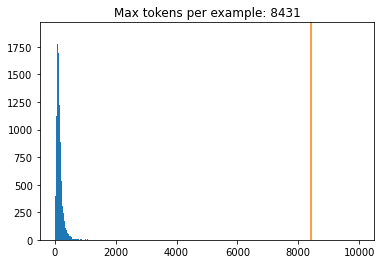

In [ ]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 10000, 1000))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Max tokens per example: {max_length}');



In [ ]:
# from above figure
MAX_TOKENS = 500

In [ ]:
#  a function to drop the examples longer than MAX_TOKENS:
def filter_max_tokens(prob, sol):
  num_tokens = tf.maximum(tf.shape(prob)[1],tf.shape(sol)[1])
  return num_tokens < MAX_TOKENS

In [ ]:
# a function that tokenizes the batches of raw text
def tokenize_pairs(prob, sol):
    prob = tokenizers.prob.tokenize(prob)
    # Convert from ragged to dense, padding with zeros.
    prob = prob.to_tensor()

    sol = tokenizers.sol.tokenize(sol)
    # Convert from ragged to dense, padding with zeros.
    sol = sol.to_tensor()
    return prob, sol

In [ ]:
#k fold split by default k =10

def split_func(i , data):
  
  validation_ls = []
  training_ls = []

  r = int(len(data)/i)
  extra = len(data) - r*i

  data = data[:-extra]

  for k in range(0, len(data), r):
    val_ls = data[k:k+r]
    train1 = data[0:k]
    train2 = data[k+r:]
    
    if (len(val_ls)== 0): continue
    else: validation_ls.append(val_ls)

    if (len(train1)== 0): training_ls.append(train2)
    elif(len(train2)==0): training_ls.append(train1)
    else: 
      train_ls = train1.append(train2)
      training_ls.append(train_ls)
  return validation_ls, training_ls



In [ ]:
# k fold
k_fold = 5
val_data_list, train_data_list = split_func(k_fold,dataset)

In [ ]:
print(len(val_data_list))
print(len(train_data_list))
print(train_data_list[0].shape)
print(val_data_list[0].shape)


5
5
(11636, 2)
(2909, 2)


In [ ]:
print(train_data_list[4])
  

                                              pseudocode  \
0      if b=1 return a_ else call function gcd(b_ a%b...   
1      let a and b be strings    n = integer    st = ...   
2      declare integers n_ m_ su = 0_ su2 = 0_ a_ b a...   
3      if a is 0_ return b from function    return re...   
4      create map iterator it from string to integer ...   
...                                                  ...   
11631  declare integer i    declare string a    read ...   
11632  let n and k be ints    let a be an int array o...   
11633  if x is equal to 0 and s % 2 is odd        els...   
11634  create string s    read s    set k to size of ...   
11635  let r_ c be integers    read r_ c    s = array...   

                                                    code  
0      return !b ? a : gcd(b_ a % b);    }    int mai...  
1      string a_ b;    int n;    set<string> st;    c...  
2      int n_ m_ su = 0_ su2 = 0_ a_ b_ c;    cin >> ...  
3      if (a == 0) return b;    return gcd1

In [ ]:
# for p , s in train_data:
#   print(p)
#   print(s)

In [ ]:
# input pipeline that processes, shuffles and batches the data

BUFFER_SIZE = 20000
BATCH_SIZE = 64

def make_batches(ds):
  return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(tokenize_pairs, num_parallel_calls=tf.data.AUTOTUNE)
      .filter(filter_max_tokens)
      .prefetch(tf.data.AUTOTUNE))



In [ ]:
#positional encoding
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 2048, 512)


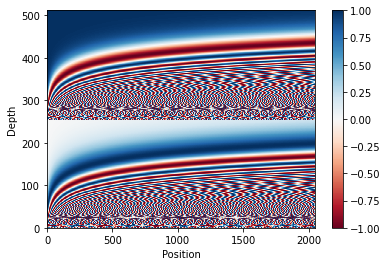

In [ ]:
n, d = 2048, 512
pos_encoding = positional_encoding(n, d)
print(pos_encoding.shape)
pos_encoding = pos_encoding[0]

# Juggle the dimensions for the plot
pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

In [ ]:
#Masking
# Mask all the pad tokens in the batch of sequence. 
# It ensures that the model does not treat padding as the input. 
# The mask indicates where pad value 0 is present:
#  it outputs a 1 at those locations, and a 0 otherwise.
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1

In [ ]:
# !pip install tensorflow-probability

In [ ]:
# import tensorflow_probability as tfp

In [ ]:
# The look-ahead mask is used to mask the future tokens in a sequence.
#  In other words, the mask indicates which entries should not be used.

# This means that to predict the third token, only the first and second token
#  will be used. Similarly to predict the fourth token, only the first,
#   second and the third tokens will be used and so on.

def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)


# def create_look_ahead_mask(size):
#     n = int(size * (size+1) / 2)
#     mask = tfp.math.fill_triangular(tf.ones((n,), dtype=tf.int32), upper=False)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead)
  but it must be broadcastable for addition.

  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable
          to (..., seq_len_q, seq_len_k). Defaults to None.

  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [ ]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print('Attention weights are:')
  print(temp_attn)
  print('Output is:')
  print(temp_out)

In [ ]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[1, 0],
                      [10, 0],
                      [100, 5],
                      [1000, 6]], dtype=tf.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [ ]:
class MultiHeadAttention(keras.layers.Layer):
  def __init__(self,*, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = keras.layers.Dense(d_model)
    self.wk = keras.layers.Dense(d_model)
    self.wv = keras.layers.Dense(d_model)

    self.dense = keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights

In [ ]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
  return keras.Sequential([
      keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [ ]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

In [ ]:
class EncoderLayer(keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = keras.layers.Dropout(rate)
    self.dropout2 = keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

    return out2

In [ ]:
sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

In [ ]:
class DecoderLayer(keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
    self.mha2 = MultiHeadAttention(d_model=d_model, num_heads=num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = keras.layers.Dropout(rate)
    self.dropout2 = keras.layers.Dropout(rate)
    self.dropout3 = keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)

    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

    return out3, attn_weights_block1, attn_weights_block2

In [ ]:
sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output,
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

In [ ]:

#encoder consists of input embedding , positional encoding and n encoder layers

class Encoder(keras.layers.Layer):
  def __init__(self,*, num_layers, d_model, num_heads, dff, input_vocab_size,
               rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(MAX_TOKENS, self.d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model, num_heads=num_heads, dff=dff, rate=rate)
        for _ in range(num_layers)]

    self.dropout = keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]

    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  # (batch_size, input_seq_len, d_model)

In [ ]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, input_vocab_size=8500)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


In [ ]:
class Decoder(keras.layers.Layer):
  def __init__(self,*, num_layers, d_model, num_heads, dff, target_vocab_size,
               rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(MAX_TOKENS, d_model)

    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads, dff=dff, rate=rate)
        for _ in range(num_layers)]
    self.dropout = keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}

    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)

      attention_weights[f'decoder_layer{i+1}_block1'] = block1
      attention_weights[f'decoder_layer{i+1}_block2'] = block2

    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [ ]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, target_vocab_size=8000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input,
                              enc_output=sample_encoder_output,
                              training=False,
                              look_ahead_mask=None,
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

In [ ]:
class Transformer(keras.Model):
  def __init__(self,*, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           input_vocab_size=input_vocab_size, rate=rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           target_vocab_size=target_vocab_size, rate=rate)

    self.final_layer = keras.layers.Dense(target_vocab_size)

  def call(self, inputs, training):
    # Keras models prefer if you pass all your inputs in the first argument
    inp, tar = inputs

    padding_mask, look_ahead_mask = self.create_masks(inp, tar)

    enc_output = self.encoder(inp, training, padding_mask)  # (batch_size, inp_seq_len, d_model)

    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, padding_mask)

    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

    return final_output, attention_weights

  def create_masks(self, inp, tar):
    # Encoder padding mask (Used in the 2nd attention block in the decoder too.)
    padding_mask = create_padding_mask(inp)

    # Used in the 1st attention block in the decoder.
    # It is used to pad and mask future tokens in the input received by
    # the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return padding_mask, look_ahead_mask

In [ ]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048,
    input_vocab_size=8500, target_vocab_size=8000)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer([temp_input, temp_target], training=False)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 36, 8000])

In [ ]:
# hyperparameters
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-3)

Text(0.5, 0, 'Train Step')

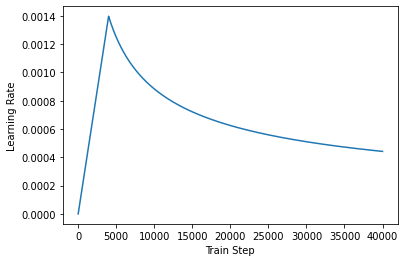

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [ ]:
loss_object = keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
  accuracies = tf.equal(real, tf.argmax(pred, axis=2))

  mask = tf.math.logical_not(tf.math.equal(real, 0))
  accuracies = tf.math.logical_and(mask, accuracies)

  accuracies = tf.cast(accuracies, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [ ]:
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.Mean(name='train_accuracy')

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.prob.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.sol.get_vocab_size().numpy(),
    rate=dropout_rate)

In [ ]:
checkpoint_path = './checkpoints/train'

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored!!')

In [ ]:
EPOCHS = 20

In [ ]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.
loss_lst = []
acc_lst = []
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]


@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]

  with tf.GradientTape() as tape:
    predictions, _ = transformer([inp, tar_inp],
                                 training = True)
    loss = loss_function(tar_real, predictions)

  accuracy = accuracy_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  loss_lst.append(loss)
  acc_lst.append(accuracy)
  
  train_loss(loss)
  train_accuracy(accuracy)



In [ ]:
e_list =[]
acc_list = []
loss_list = []

for i in range(0,k_fold):
  temp_t = train_data_list[i]
  # temp_v = val_data_list[i]  
  tens_t, tp, ts = dataset_to_tensor(temp_t)
  # tens_v, vp, vs = dataset_to_tensor(temp_v)

  train_data = tens_t
  # val_data = tens_v

  train_batches = make_batches(train_data)
  # val_batches = make_batches(val_data)

  for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()

    # inp -> problem pseudocode, tar -> solution in c++
    for (batch, (inp, tar)) in enumerate(train_batches):
      train_step(inp, tar)

      if batch % 50 == 0:
        print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

    if (epoch + 1) % 5 == 0:
      ckpt_save_path = ckpt_manager.save()
      print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

    print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
    e_list.append(epoch+1)
    loss_list.append(train_loss.result())
    acc_list.append(train_accuracy.result())
    print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')
    


declare integer variables n_ d and res and array of integers dp with size 105    declare string str    read n and d    read str    assign value of 0 to dp[0]    for i = 1 to n exclusive    if str[i] = '1'    set res to INT_MAX    for j = i - 1 decrement j while j >= 0 and j >= i - d    if str[j] = '1'_ set res to min of res and dp[j]        dp[i] = INT_MAX if res == INT_MAX or res + 1 otherwise            res = -1 if dp[n - 1] == INT_MAX or dp[n - 1] otherwise    print res        
<class 'list'>
int n_ d_ dp[105]_ res;    string str;    cin >> n >> d;    cin >> str;    dp[0] = 0;    for (int i = 1; i < n; ++i) {    if (str[i] == '1') {    res = INT_MAX;    for (int j = i - 1; j >= 0 && j >= i - d; --j) {    if (str[j] == '1') { res = min(res_ dp[j]); }    }    dp[i] = (res == INT_MAX) ? INT_MAX : (res + 1);    }    }    res = (dp[n - 1] == INT_MAX) ? -1 : dp[n - 1];    cout << res << endl;    }    
<class 'list'>
if b=1 return a_ else call function gcd(b_ a%b)            n _ nn_ ans = 

tensorflow.python.framework.ops.Tensor

In [ ]:
print(len(acc_list))

100


In [ ]:
print(len(e_list))

100


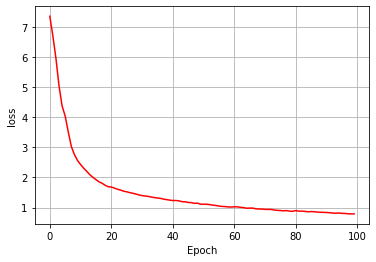

In [ ]:
# plot of accuracy and loss of training data
# e_list =[]
# acc_list = []
# loss_list = []
xptt_loss = np.array(range(100))
yptt_loss = np.array(loss_list)

plt.plot(xptt_loss, yptt_loss,color = 'r')
# zpoints = np.array(acc_list)

# plt.plot(xpoints, zpoints,color = 'g')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.grid()
plt.show()

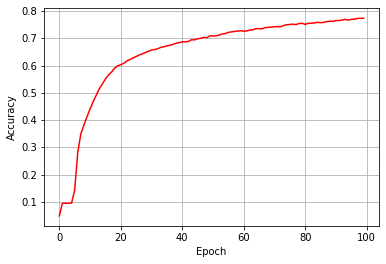

In [ ]:
# e_list =[]
# acc_list = []
# loss_list = []
xpoints = np.array(range(100))
ypoints = np.array(acc_list)

plt.plot(xpoints, ypoints,color = 'r')
# zpoints = np.array(acc_list)

# plt.plot(xpoints, zpoints,color = 'g')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.
val_loss_lst = []
val_acc_lst = []
val_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]


@tf.function(input_signature=val_step_signature)
def val_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]

  with tf.GradientTape() as tape:
    predictions, _ = transformer([inp, tar_inp],
                                 training = False)
    loss = loss_function(tar_real, predictions)

  accuracy = accuracy_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  val_loss_lst.append(loss)
  val_acc_lst.append(accuracy)
  
  train_loss(loss)
  train_accuracy(accuracy)



In [ ]:
e_list =[]
val_acc_list = []
val_loss_list = []

for i in range(0,k_fold):

  temp_v = val_data_list[i]  
 
  tens_v, vp, vs = dataset_to_tensor(temp_v)

  val_data = tens_v

  val_batches = make_batches(val_data)


  for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()

    # inp -> problem pseudocode, tar -> solution in c++
    for (batch, (inp, tar)) in enumerate(val_batches):
      train_step(inp, tar)

      if batch % 50 == 0:
        print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

    if (epoch + 1) % 5 == 0:
      ckpt_save_path = ckpt_manager.save()
      print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

    print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
    e_list.append(epoch+1)
    val_loss_list.append(train_loss.result())
    val_acc_list.append(train_accuracy.result())
    print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')
  


if b=1 return a_ else call function gcd(b_ a%b)            n _ nn_ ans = integers with ans =0    Read n    for i=2 to n-1 execute    set nn to n    while nn is not equal to 0_ set ans to ans + nn%i_ and also set nn= nn/i        set o to gcd(ans_ n-2)    print out ans/o "/" (n-2)/o            function gcd with integer arguments a and b    return !b ? a : gcd(b_ a % b)            integers n_ nn and ans = 0    read n    for i = 2 to n - 1 inclusive    set nn to n    while nn increment ans by (nn % i) and set nn to nn / i;        integer o = gcd of ans and n - 2    print ans / o_ "/"_ (n - 2) / o and "\n"            
<class 'list'>
return !b ? a : gcd(b_ a % b);    }    int main() {    int n_ nn_ ans = 0;    cin >> n;    for (int i = 2; i <= n - 1; ++i) {    nn = n;    while (nn) ans += nn % i_ nn /= i;    }    int o = gcd(ans_ n - 2);    cout << ans / o << "/" << (n - 2) / o << "\n";    return 0;    }    int gcd(int a_ int b) {    return !b ? a : gcd(b_ a % b);    }    int main() {    int

KeyboardInterrupt: ignored

ValueError: ignored

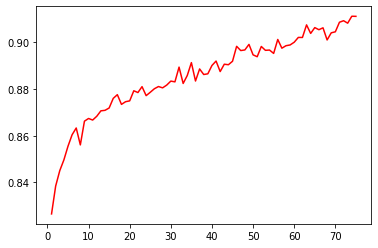

In [ ]:
# e_list =[]
# acc_list = []
# loss_list = []
xpoints = np.array(e_list)
ypoints = np.array(val_acc_list)

plt.plot(xpoints, ypoints,color = 'r')
zpoints = np.array(acc_list)

# plt.plot(xpoints, zpoints,color = 'g')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

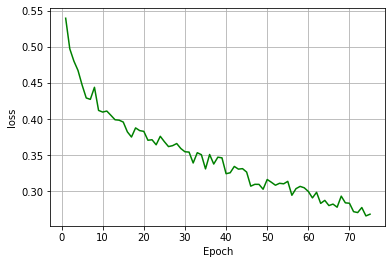

In [ ]:
# e_list =[]
# acc_list = []
# loss_list = []
xpoints = np.array(e_list)
ypoints = np.array(val_loss_list)

plt.plot(xpoints, ypoints,color = 'g')
# zpoints = np.array(acc_list)

# plt.plot(xpoints, zpoints,color = 'g')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.grid()
plt.show()

In [ ]:
class Translator(tf.Module):
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):
    # input sentence is problem statement, hence adding the start and end token
    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.prob.tokenize(sentence).to_tensor()

    encoder_input = sentence

    # As the output language is cpp program, initialize the output with the
    # english start token.
    start_end = self.tokenizers.sol.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # `tf.TensorArray` is required here (instead of a python list) so that the
    # dynamic-loop can be traced by `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions, _ = self.transformer([encoder_input, output], training=False)

      # select the last token from the seq_len dimension
      predictions = predictions[:, -1:, :]  # (batch_size, 1, vocab_size)

      predicted_id = tf.argmax(predictions, axis=-1)

      # concatentate the predicted_id to the output which is given to the decoder
      # as its input.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # output.shape (1, tokens)
    text = tokenizers.sol.detokenize(output)[0]  # shape: ()

    tokens = tokenizers.sol.lookup(output)[0]

    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop. So recalculate them outside
    # the loop.
    _, attention_weights = self.transformer([encoder_input, output[:,:-1]], training=False)

    return text, tokens, attention_weights

In [ ]:
translator = Translator(tokenizers, transformer)

In [ ]:
def print_translation(sentence, tokens, ground_truth):
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Ground truth":15s}: {ground_truth}')

In [ ]:
sentence = 'declare integers num1 num2'
ground_truth = 'int num1,num2;'

translated_text, translated_tokens, attention_weights = translator( tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

In [ ]:
sentence = 'create map iterator it from string to integer    create integer n    read n    read character    for i = 0 to n exclusive    create sting str    read line from cin to str    set m[str] to 1    create integer ans with ans = 0    for it = beginning of m to it is not end of m_ incrementing it_ increment ans    print ans print newline    '
ground_truth = 'map<string_ int>::iterator it;    int main() {    int n;    cin >> n;    getchar();    for (int i = 0; i < n; i++) {    string str;    getline(cin_ str);    m[str] = 1;    }    int ans = 0;    for (it = m.begin(); it != m.end(); it++) { ans++; }    cout << ans << endl;    }    '

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

In [ ]:
def plot_attention_head(in_tokens, translated_tokens, attention):
  # The plot is of the attention when a token was generated.
  # The model didn't generate `<START>` in the output. Skip it.
  translated_tokens = translated_tokens[1:]
  fig = plt.figure(figsize=(16, 10))
  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [ ]:
head = 0
# shape: (batch=1, num_heads, seq_len_q, seq_len_k)
attention_heads = tf.squeeze(
  attention_weights['decoder_layer4_block2'], 0)
attention = attention_heads[head]
attention.shape

In [ ]:
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.prob.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.prob.lookup(in_tokens)[0]
in_tokens

In [ ]:
translated_tokens

In [ ]:
plot_attention_head(in_tokens, translated_tokens, attention)

In [ ]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.prob.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.prob.lookup(in_tokens)[0]
  in_tokens

  fig = plt.figure(figsize=(16, 10))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

In [ ]:
plot_attention_weights(sentence, translated_tokens,
                       attention_weights['decoder_layer4_block2'][0])

In [ ]:
class ExportTranslator(tf.Module):
  def __init__(self, translator):
    self.translator = translator

  @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
  def __call__(self, sentence):
    (result,
     tokens,
     attention_weights) = self.translator(sentence, max_length=MAX_TOKENS)

    return result

In [ ]:
translator = ExportTranslator(translator)

In [ ]:
tf.saved_model.save(translator, export_dir='drive/MyDrive/Datasets/data')

In [ ]:
model_t = tf.saved_model.load('drive/MyDrive/Datasets/data/')

In [ ]:
model_t('print hello world').numpy()

In [ ]:
model_t('declare int n   read n   print n+1 ').numpy()

In [ ]:
model_t('print hi').numpy()

In [ ]:
model_t('''Read number 
declare int Fact = 1
i = 1
WHILE i<=number
    Fact=Fact*i
    i=i+1
ENDWHILE
WRITE Fact ''').numpy()

In [ ]:
model_t('''
 Declare Variable n, fact, i
 Read number from User
 Initialize Variable fact=1 and i=1
 Repeat Until i<=number
             fact=fact*i
             i=i+1
 Print fact
 ''').numpy()

In [ ]:
model_t('''
Take integer variable A, B, C
Set A = 0, B = 0
DISPLAY A, B
for n times
  C = A + B
  DISPLAY C
  Set A = B, B = C
''').numpy()

In [ ]:
# e_list =[]
# acc_list = []
# loss_list = []
xpoints = np.array(e_list)
ypoints = np.array(loss_list)

plt.plot(xpoints, ypoints,color = 'r')
zpoints = np.array(acc_list)

# plt.plot(xpoints, zpoints,color = 'g')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.grid()
plt.show()

In [ ]:
xpoints = np.array(e_list)
ypoints = np.array(acc_list)
plt.grid()
plt.plot(xpoints, ypoints,color = 'g')
plt.show()